In [ ]:
# Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/final_data.csv')   #Change Path to your Drive Directory accordingly.
data = data.drop(['address','Unnamed: 0'],axis = 1)
data["label"]= data["label"].replace(28, "white") 
data["label"]= data["label"].replace('28', "white") 
classes = data.label.unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(data)

        year  day  length  ...  neighbors        income            label
0       2017   11      18  ...          2  1.000500e+08  princetonCerber
1       2016  132      44  ...          1  1.000000e+08   princetonLocky
2       2016  246       0  ...          2  2.000000e+08  princetonCerber
3       2016  322      72  ...          2  7.120000e+07  princetonCerber
4       2016  238     144  ...          1  2.000000e+08   princetonLocky
...      ...  ...     ...  ...        ...           ...              ...
315195  2018  330       0  ...          2  2.503180e+09            white
315196  2018  330       0  ...          2  1.000000e+09            white
315197  2018  330       6  ...          1  3.000000e+08            white
315198  2018  330       0  ...          2  1.372746e+09            white
315199  2018  330       6  ...          2  2.397816e+09            white

[315200 rows x 9 columns]


In [ ]:
print('Value Counts:\n',data['label'].value_counts())
print('Total labels: ',len(data['label'].unique()))

Value Counts:
 white                          232374
paduaCryptoWall                 24780
montrealCryptoLocker            18630
princetonCerber                 18446
princetonLocky                  13250
montrealCryptXXX                 4838
montrealNoobCrypt                 966
montrealDMALockerv3               708
montrealDMALocker                 502
montrealSamSam                    124
montrealGlobeImposter             110
montrealCryptoTorLocker2015       110
montrealGlobev3                    68
montrealGlobe                      64
montrealWannaCry                   56
montrealRazy                       26
montrealAPT                        22
paduaKeRanger                      20
montrealFlyper                     18
montrealXTPLocker                  16
montrealXLockerv5.0                14
montrealCryptConsole               14
montrealVenusLocker                14
montrealEDA2                       12
montrealJigSaw                      8
paduaJigsaw                        

Log Transformations [Run only once :)]

In [ ]:
import numpy as np
eps = 0.001
data['income'] = np.log(data.pop('income')+eps)
data['weight'] = np.log(data.pop('weight')+eps)
data['count'] = np.log(data.pop('count')+eps)
data['looped'] = np.log(data.pop('looped')+eps)
data['neighbors'] = np.log(data.pop('neighbors')+eps)
data['length'] = np.log(data.pop('length')+eps)
data['day'] = np.log(data.pop('day')+eps)

print(data['length'].min())
print(data['length'].max())
print(data['count'].min())
print(data['count'].max())
print(data.looped.min())
print(data.looped.max())
print(data.neighbors.min())
print(data.neighbors.max())
print(data.income.min())
print(data.income.max())
print(data.weight.min())
print(data.weight.max())

-6.907755278982137
4.969820243996333
0.0009995003330834232
9.581628097267306
-6.907755278982137
9.581628097267306
0.0009995003330834232
7.340836202631495
17.216707939659763
31.536556508367305
-6.907755278982137
6.211181285295772


In [ ]:
print(data)

        year            label     income  ...  neighbors    length       day
0       2017  princetonCerber  18.421181  ...   0.693647  2.890427  2.397986
1       2016   princetonLocky  18.420681  ...   0.001000  3.784212  4.882809
2       2016  princetonCerber  19.113828  ...   0.693647 -6.907755  5.505336
3       2016  princetonCerber  18.081003  ...   0.693647  4.276680  5.774555
4       2016   princetonLocky  19.113828  ...   0.001000  4.969820  5.472275
...      ...              ...        ...  ...        ...       ...       ...
315195  2018            white  21.640828  ...   0.693647 -6.907755  5.799096
315196  2018            white  20.723266  ...   0.693647 -6.907755  5.799096
315197  2018            white  19.519293  ...   0.001000  1.791926  5.799096
315198  2018            white  21.040079  ...   0.693647 -6.907755  5.799096
315199  2018            white  21.597824  ...   0.693647  1.791926  5.799096

[315200 rows x 9 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].unique()

array([26, 27,  4,  3, 23, 19,  7,  5, 17,  9, 14,  6, 10,  8, 25, 18, 22,
       24, 12, 13, 21, 20, 15,  2, 11, 16,  1,  0, 28])

In [ ]:
le.classes_

array(['montrealAPT', 'montrealComradeCircle', 'montrealCryptConsole',
       'montrealCryptXXX', 'montrealCryptoLocker',
       'montrealCryptoTorLocker2015', 'montrealDMALocker',
       'montrealDMALockerv3', 'montrealEDA2', 'montrealFlyper',
       'montrealGlobe', 'montrealGlobeImposter', 'montrealGlobev3',
       'montrealJigSaw', 'montrealNoobCrypt', 'montrealRazy',
       'montrealSam', 'montrealSamSam', 'montrealVenusLocker',
       'montrealWannaCry', 'montrealXLocker', 'montrealXLockerv5.0',
       'montrealXTPLocker', 'paduaCryptoWall', 'paduaJigsaw',
       'paduaKeRanger', 'princetonCerber', 'princetonLocky', 'white'],
      dtype=object)

In [ ]:
X = data.loc[:, data.columns != 'label']
y = data['label']

In [ ]:
print(X)
print(y)

        year     income    weight  ...  neighbors    length       day
0       2017  18.421181 -4.674163  ...   0.693647  2.890427  2.397986
1       2016  18.420681 -6.689310  ...   0.001000  3.784212  4.882809
2       2016  19.113828  0.001000  ...   0.693647 -6.907755  5.505336
3       2016  18.081003 -5.317245  ...   0.693647  4.276680  5.774555
4       2016  19.113828 -2.605741  ...   0.001000  4.969820  5.472275
...      ...        ...       ...  ...        ...       ...       ...
315195  2018  21.640828 -2.188265  ...   0.693647 -6.907755  5.799096
315196  2018  20.723266 -0.691149  ...   0.693647 -6.907755  5.799096
315197  2018  19.519293 -3.858840  ...   0.001000  1.791926  5.799096
315198  2018  21.040079 -1.095617  ...   0.693647 -6.907755  5.799096
315199  2018  21.597824  0.001000  ...   0.693647  1.791926  5.799096

[315200 rows x 8 columns]
0         26
1         27
2         26
3         26
4         27
          ..
315195    28
315196    28
315197    28
315198    28
315

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2020,stratify = y)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252160
63040
252160
63040


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier()
model = ExtraTreesClassifier(max_features='log2',min_samples_split=3)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

---


Uncoment & run only once!!!


---





In [ ]:
#Not present in test set & RUN ONLY ONCE
'''test_labels = np.delete(classes, [21,25,26])    
print(test_labels)'''

['princetonCerber' 'princetonLocky' 'montrealCryptoLocker'
 'montrealCryptXXX' 'paduaCryptoWall' 'montrealWannaCry'
 'montrealDMALockerv3' 'montrealCryptoTorLocker2015' 'montrealSamSam'
 'montrealFlyper' 'montrealNoobCrypt' 'montrealDMALocker' 'montrealGlobe'
 'montrealEDA2' 'paduaKeRanger' 'montrealVenusLocker' 'montrealXTPLocker'
 'paduaJigsaw' 'montrealGlobev3' 'montrealJigSaw' 'montrealXLockerv5.0'
 'montrealRazy' 'montrealCryptConsole' 'montrealGlobeImposter'
 'montrealAPT' 'white']


In [ ]:
# make predictions
predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, predictions)
acc = accuracy_score(y_test, predictions)
f1_score = f1_score(y_test, predictions,average='weighted')
recall = recall_score(y_test, predictions,average='weighted')
precision = precision_score(y_test, predictions,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

Mean Absolute Error :  0.5238578680203045
Accuracy:  0.9529187817258883
Recall:  0.9529187817258883
Precision:  0.9543455950297851
F1-score:  0.9532743980341299


In [ ]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(y_test, predictions, target_names=test_labels, digits = 4)
print(classification_metrics)

                             precision    recall  f1-score   support

            princetonCerber     1.0000    1.0000    1.0000         4
             princetonLocky     1.0000    1.0000    1.0000         3
       montrealCryptoLocker     0.9556    0.9773    0.9663       968
           montrealCryptXXX     0.8611    0.8948    0.8776      3726
            paduaCryptoWall     0.9412    0.7273    0.8205        22
           montrealWannaCry     0.9318    0.8200    0.8723       100
        montrealDMALockerv3     0.9244    0.7746    0.8429       142
montrealCryptoTorLocker2015     1.0000    1.0000    1.0000         2
             montrealSamSam     1.0000    1.0000    1.0000         4
             montrealFlyper     1.0000    0.6923    0.8182        13
          montrealNoobCrypt     0.8421    0.7273    0.7805        22
          montrealDMALocker     1.0000    0.7857    0.8800        14
              montrealGlobe     1.0000    1.0000    1.0000         2
               montrealEDA2     0

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()

parameters = {'bootstrap':[True,False], # false shows best accuracy
              'ccp_alpha':[0.0], #default value
              'class_weight':[None], #default value
             'max_depth':[None],      #default value        
             'max_features':['log2','auto'], #log2 91.77
              'max_leaf_nodes':[None], #default value
              'max_samples':[None], #default value
              'min_impurity_decrease':[0.0], #default value
              'min_samples_split':[1,2,3,4],  #2->4->3
              'min_weight_fraction_leaf':[0.0,0.2,0.5] #default value
              'random_state':[0,42] #default value (only set if bootstrap true)
              'max_samples':[0.1,0.7,0.5,2,3,4] #default value (only set if bootstrap true)
              }
              


clf = GridSearchCV(model, parameters,
                   cv=StratifiedKFold(n_splits=4), 
                   scoring='accuracy',
                   verbose=2, refit=True)

clf.fit(X_train,y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV] bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0 


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0, total=  20.2s
[CV] bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.2s remaining:    0.0s


[CV]  bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0, total=  17.5s
[CV] bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0 
[CV]  bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0, total=  17.8s
[CV] bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0 
[CV]  bootstrap=True, max_features=log2, max_samples=0.9, min_samples_split=3, random_state=0, total=  17.5s
[CV] bootstrap=False, max_features=log2, min_samples_split=3 .........
[CV]  bootstrap=False, max_features=log2, min_samples_split=3, total=  24.9s
[CV] bootstrap=False, max_features=log2, min_samples_split=3 .........
[CV]  bootstrap=False, max_features=log2, min_samples_split=3, total=  23.9s
[CV] bootstrap=False, max_features=log2, min_samples_split=3 .........
[CV]  bootstrap=False, max_features=log2, min_samples_split=3, total=  23.9s
[CV] bootstrap=False, max_features=log2, 

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            m...
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
          

In [ ]:
print(clf.best_score_)
print(clf.best_params_)

0.9253291560913706
{'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 3}


max depth: 1
max leaf nodes :10/4/2
n_estimators:50/10/1

EDA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/Bitcoin Heist/final_data.csv')   #Change Path to your Drive Directory accordingly.
data = data.drop(['address','Unnamed: 0'],axis = 1)
data["label"] = data["label"].replace(28, "white") 
data["label"] = data["label"].replace('28', "white") 
classes = data.label.unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ConversionError: ignored

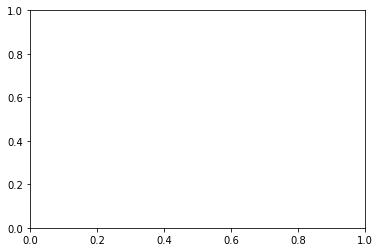

In [ ]:
import matplotlib.pyplot as plt

x = data['count']
y = data['label']

plt.hist(x, y)
plt.show()

In [ ]:
x